                                                Abilita Informatiche

Preparato da: Allison Thome

#### Import libraries

In [1]:
import numpy as np               
from astropy.io import fits
import matplotlib.pyplot as plt

#### Definition of variables and functions

##### Variables for single multipole

In [2]:
Nbins = 200
Nsim = 100
measures1 = []
measures2 = []
measures3 = []

##### Variables for multiple multipole

In [3]:
Nbins1 = 600
measures31 = []
measures32 = []
measures33 = []
v1=[]
v2=[]
v3=[]
v4=[]
v5=[]
v6=[]

##### Definition of function

In [4]:
#Autocorrelation of single multipole:
def fs(r1, r2, sig, h):
    return sig**2.*np.exp(-(r1 - r2)**2./(2.*h**2.))

#Mixed correlation:
def fm(r1, r2, sig1, h1, sig2, h2):
    return (sig1*sig2*np.sqrt((2.*h1*h2)/(h1**2. + h2**2.))*np.exp(-(r1 - r2)**2./(h1**2. + h2**2.)))

#### Import data of files

In [5]:
#Test 1
for i in np.arange(Nsim)+1:
    
    fname = '/Users/ally_/OneDrive/Escritorio/AInfo/data/MockMeasures_2PCF_Test{}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{}_{}.fits'.format(1, 1, i)
    
    #For single and three multipoles
    file = fits.open(fname)
    table = file[1].data.copy()
    measures1.append(table['XI0'])
    v1.append(table['XI2'])
    v2.append(table['XI4'])
    if i==1:
        scale1 = table['SCALE']
    del table
    file.close()

measures1=np.asarray(measures1).transpose() #vector for single multipole
v1=np.array(v1).transpose()
v2=np.array(v2).transpose()

measures31=np.array(measures31)
measures31=np.concatenate((measures1,v1,v2),axis=0) #concatenated vector for three multipoles


#Test 2
for i in np.arange(Nsim)+1:
    
    fname1 = '/Users/ally_/OneDrive/Escritorio/AInfo/data/MockMeasures_2PCF_Test{}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{}_{}.fits'.format(2, 2, i)
    
    #For single and three multipoles
    file1 = fits.open(fname1)
    table1 = file1[1].data.copy()
    measures2.append(table1['XI0'])
    v3.append(table1['XI2'])
    v4.append(table1['XI4'])
    if i==1:
        scale2 = table1['SCALE']
    del table1
    file1.close()

measures2=np.asarray(measures2).transpose() #vector for single multipole
v3=np.array(v3).transpose()
v4=np.array(v4).transpose()

measures32=np.array(measures32)
measures32=np.concatenate((measures2,v3,v4),axis=0)  #concatenated vector for three multipoles


#Test 3
for i in np.arange(Nsim)+1:
    
    fname2 = '/Users/ally_/OneDrive/Escritorio/AInfo/data/MockMeasures_2PCF_Test{}/MockMeasures_2PCF_Correlation_MULTIPOLES_Test{}_{}.fits'.format(3, 3, i)
    
    #For single and three multipoles
    file2 = fits.open(fname2)
    table2 = file2[1].data.copy()
    measures3.append(table2['XI0'])
    v5.append(table2['XI2'])
    v6.append(table2['XI4'])
    if i==1:
        scale3 = table2['SCALE']
    del table2
    file1.close()

measures3=np.asarray(measures3).transpose() #vector for single multipole
v5=np.array(v5).transpose()
v6=np.array(v6).transpose()

measures33=np.array(measures33)
measures33=np.concatenate((measures3,v5,v6),axis=0)  #concatenated vector for three multipoles

### Single Multipole

#### Measured Covariance (Numpy)

In [6]:
#Test 1:
cov1 = np.cov(measures1)

#Test 2:
cov2 = np.cov(measures2)

#Test 3:
cov3 = np.cov(measures3)

#### Calculation of covariance by standard method

In [7]:
#Test 1:
average1 = np.zeros((Nbins), dtype=float)
cov_sm1 = np.zeros((Nbins,Nbins),dtype=float)
    
for i in range(Nsim):
    average1 += measures1[:,i]
average1 /= Nsim
    
for i in range(Nbins):
    for j in range(Nbins):
        cov_sm1[i,j] = (np.sum((measures1[i]-average1[i])*(measures1[j]-average1[j]))) / (Nsim-1)
print('Test 1:')
print('Biggest desviation between measured covariance and covariance by standard method: {}'.format(np.max(np.abs(cov_sm1-cov1))))
print('')

#Test 2:
average2 = np.zeros((Nbins), dtype=float)
cov_sm2 = np.zeros((Nbins,Nbins),dtype=float)
    
for i in range(Nsim):
    average2 += measures2[:,i]
average2 /= Nsim
    
for i in range(Nbins):
    for j in range(Nbins):
        cov_sm2[i,j] = (np.sum((measures2[i]-average2[i])*(measures2[j]-average2[j]))) / (Nsim-1) 
print('Test 2:')
print('Biggest desviation between measured covariance and covariance by standard method: {}'.format(np.max(np.abs(cov_sm2-cov2))))
print('')

#Test 3:
average3 = np.zeros((Nbins), dtype=float)
cov_sm3 = np.zeros((Nbins,Nbins),dtype=float)
    
for i in range(Nsim):
    average3 += measures3[:,i]
average3 /= Nsim
    
for i in range(Nbins):
    for j in range(Nbins):
        cov_sm3[i,j] = (np.sum((measures3[i]-average3[i])*(measures3[j]-average3[j]))) / (Nsim-1) 
print('Test 3:')
print('Biggest desviation between measured covariance and covariance by standard method: {}'.format(np.max(np.abs(cov_sm3-cov3))))

Test 1:
Biggest desviation between measured covariance and covariance by standard method: 3.7947076036992655e-19

Test 2:
Biggest desviation between measured covariance and covariance by standard method: 4.336808689942018e-19

Test 3:
Biggest desviation between measured covariance and covariance by standard method: 3.7947076036992655e-19


#### Calculation of theoretical covariance

In [8]:
#Test 1
cov_th1 = np.zeros((Nbins,Nbins),dtype=float)
for i in range(Nbins):
    for j in range(Nbins):
        cov_th1[i,j] = fs(scale1[i],scale1[j],0.02,25)

#Test 2
cov_th2 = np.zeros((Nbins,Nbins),dtype=float)
for i in range(Nbins):
    for j in range(Nbins):
        cov_th2[i,j] = fs(scale2[i],scale2[j],0.02,50)
        
#Test 3
cov_th3 = np.zeros((Nbins,Nbins),dtype=float)
for i in range(Nbins):
    for j in range(Nbins):
        cov_th3[i,j] = fs(scale3[i],scale3[j],0.02,5)

####  Mean squared difference of the normalized residuals

In [9]:
#Test 1:
norm_res1 = np.zeros_like(cov_th1)
for i in range(Nbins):
    for j in range(Nbins):
        R1 = cov_th1[i,j]/(np.sqrt(cov_th1[i,i]*cov_th1[j,j]))
        norm_res1[i,j]=(cov_th1[i,j]-cov1[i,j])*np.sqrt((Nsim-1.)/((1.+R1)*cov_th1[i,i]*cov_th1[j,j]))

result1=np.std(norm_res1)

print('Test 1:')
print(f"Result: {result1}")

if result1<1.1:
    print("-Validated-")
else:
    print("-Non validated-")

print('')

#Test 2:
norm_res2 = np.zeros_like(cov_th2)
for i in range(Nbins):
    for j in range(Nbins):
        R2 = cov_th2[i,j]/(np.sqrt(cov_th2[i,i]*cov_th2[j,j]))
        norm_res2[i,j]=(cov_th2[i,j]-cov2[i,j])*np.sqrt((Nsim-1.)/((1.+R2)*cov_th2[i,i]*cov_th2[j,j]))

result2=np.std(norm_res2)

print('Test 2:')
print(f"Result: {result2}")

if result2<1.1:
    print("-Validated-")
else:
    print("-Non validated-")
print('')
    
#Test 3:
norm_res3 = np.zeros_like(cov_th3)
for i in range(Nbins):
    for j in range(Nbins):
        R3 = cov_th3[i,j]/(np.sqrt(cov_th3[i,i]*cov_th3[j,j]))
        norm_res3[i,j]=(cov_th3[i,j]-cov3[i,j])*np.sqrt((Nsim-1.)/((1.+R3)*cov_th3[i,i]*cov_th3[j,j]))

result3=np.std(norm_res3)
print('Test 3:')
print(f"Result: {result3}")

if result3<1.1:
    print("-Validated-")
else:
    print("-Non validated-")

Test 1:
Result: 0.6238158567581635
-Validated-

Test 2:
Result: 0.7342658420479818
-Validated-

Test 3:
Result: 0.9252462114569949
-Validated-


#### Grafics

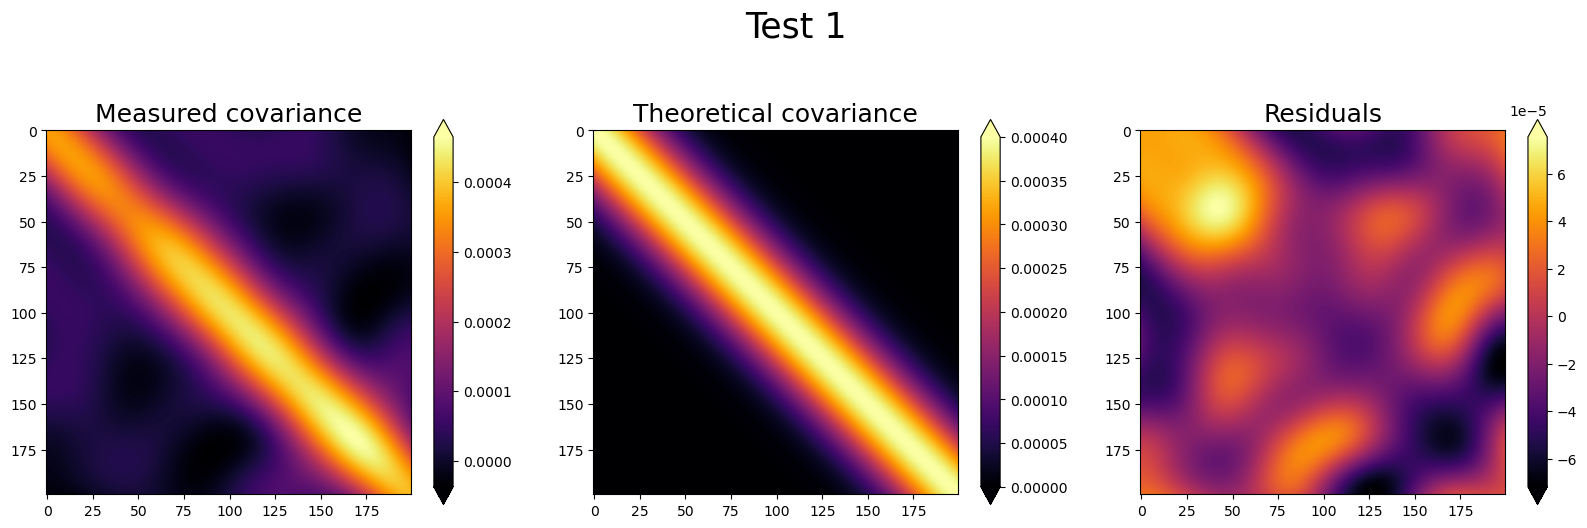

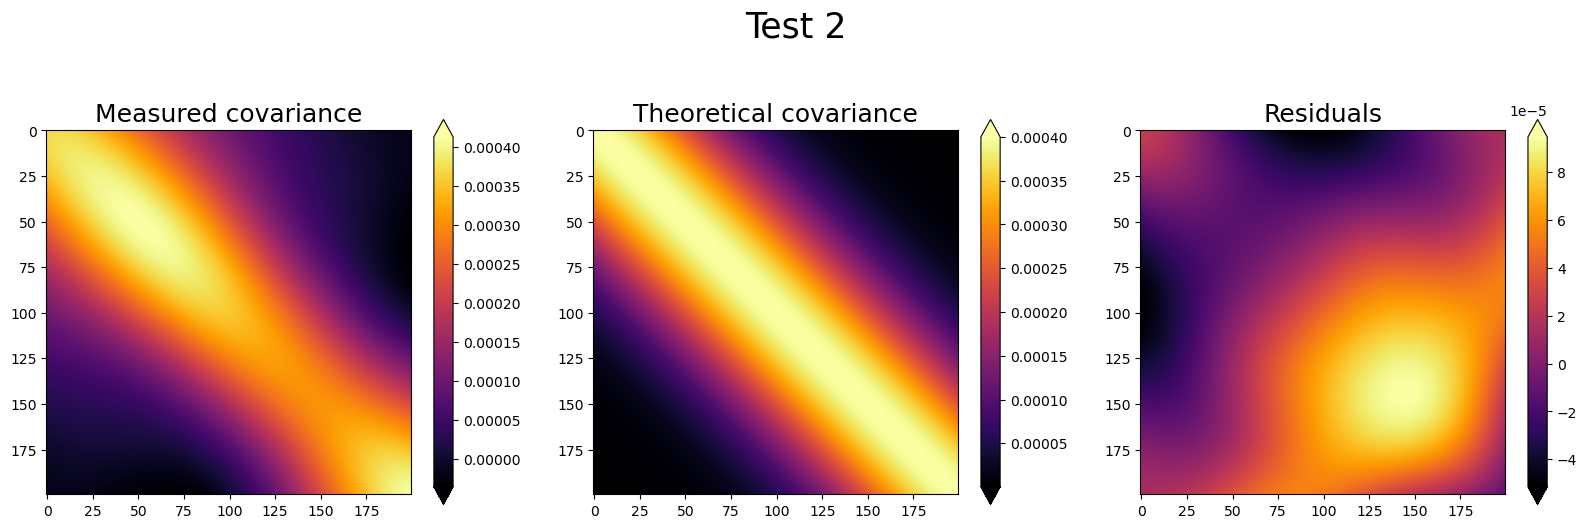

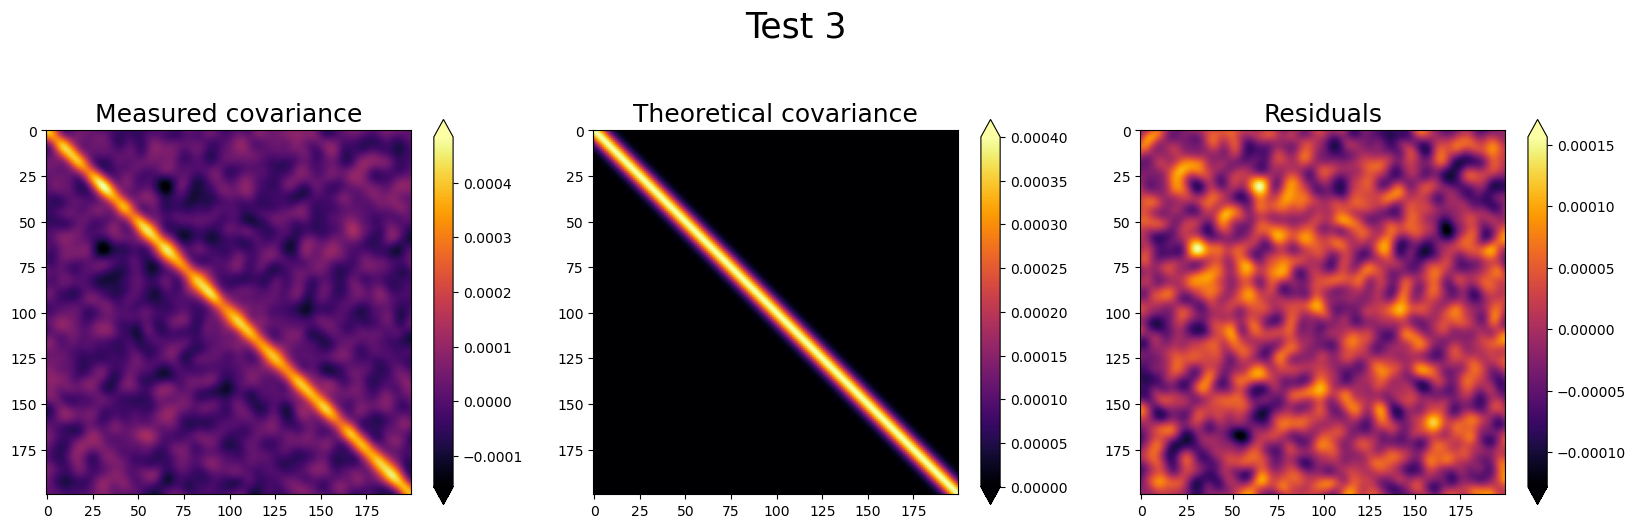

In [10]:
#Test 1

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 5), ncols=3)
fig.suptitle('Test 1',fontsize=25, y=1.1)

# Measured covariance 
cb1 = ax1.imshow(cov1, cmap='inferno')
ax1.set_title('Measured covariance', fontsize=18)
cbar = plt.colorbar(cb1, ax=ax1, extend='both')

# Theoretical covariance
ax2.set_title('Theoretical covariance', fontsize=18)
cb2 = ax2.imshow(cov_th1, cmap='inferno')
cbar = plt.colorbar(cb2, ax=ax2, extend='both')

# Residual
ax3.set_title('Residuals', fontsize=18)
cb3 = ax3.imshow(cov_th1-cov1, cmap='inferno')
cbar = plt.colorbar(cb3, ax=ax3, extend='both')


#Test 2

fig1, (ax4, ax5, ax6) = plt.subplots(figsize=(20, 5), ncols=3)
fig1.suptitle('Test 2',fontsize=25, y=1.1)

# Measured covariance
cb4 = ax4.imshow(cov2, cmap='inferno')
ax4.set_title('Measured covariance', fontsize=18)
cbar = plt.colorbar(cb4, ax=ax4, extend='both')

# Theoretical covariance
ax5.set_title('Theoretical covariance', fontsize=18)
cb5 = ax5.imshow(cov_th2, cmap='inferno')
cbar = plt.colorbar(cb5, ax=ax5, extend='both')

# Residuals
ax6.set_title('Residuals', fontsize=18)
cb6 = ax6.imshow(cov_th2-cov2, cmap='inferno')
cbar = plt.colorbar(cb6, ax=ax6, extend='both')


#Test 3

fig2, (ax7, ax8, ax9) = plt.subplots(figsize=(20, 5), ncols=3)
fig2.suptitle('Test 3',fontsize=25, y=1.1)

# Measured covariance
cb7 = ax7.imshow(cov3, cmap='inferno')
ax7.set_title('Measured covariance', fontsize=18)
cbar = plt.colorbar(cb7, ax=ax7, extend='both')

# Theoretical covariance
ax8.set_title('Theoretical covariance', fontsize=18)
cb8 = ax8.imshow(cov_th3, cmap='inferno')
cbar = plt.colorbar(cb8, ax=ax8, extend='both')

#Residuals
ax9.set_title('Residuals', fontsize=18)
cb9 = ax9.imshow(cov_th3-cov3, cmap='inferno')
cbar = plt.colorbar(cb9, ax=ax9, extend='both')
plt.show()


### Three Multipoles

#### Measured Covariance (Numpy)

In [11]:
#Test 1:
cov31 = np.cov(measures31)

#Test 2:
cov32 = np.cov(measures32)

#Test 3:
cov33 = np.cov(measures33)

#### Calculation of covariance by standard method

In [12]:
#Test 1:
average31 = np.zeros((Nbins1), dtype=float)
cov_sm31 = np.zeros((Nbins1,Nbins1),dtype=float)
    
for i in range(Nsim):
    average31 += measures31[:,i]
average31 /= Nsim
    
for i in range(Nbins1):
    for j in range(Nbins1):
        cov_sm31[i,j] = (np.sum((measures31[i]-average31[i])*(measures31[j]-average31[j]))) / (Nsim-1)
print('Test 1:')
print('Biggest desviation between measured covariance and covariance by standard method: {}'.format(np.max(np.abs(cov_sm31-cov31))))
print('')

#Test 2:
average32 = np.zeros((Nbins1), dtype=float)
cov_sm32 = np.zeros((Nbins1,Nbins1),dtype=float)
    
for i in range(Nsim):
    average32 += measures32[:,i]
average32 /= Nsim
    
for i in range(Nbins1):
    for j in range(Nbins1):
        cov_sm32[i,j] = (np.sum((measures32[i]-average32[i])*(measures32[j]-average32[j]))) / (Nsim-1) 
print('Test 2:')
print('Biggest desviation between measured covariance and covariance by standard method: {}'.format(np.max(np.abs(cov_sm32-cov32))))
print('')

#Test 3:
average33 = np.zeros((Nbins1), dtype=float)
cov_sm33 = np.zeros((Nbins1,Nbins1),dtype=float)
    
for i in range(Nsim):
    average33 += measures33[:,i]
average33 /= Nsim
    
for i in range(Nbins1):
    for j in range(Nbins1):
        cov_sm33[i,j] = (np.sum((measures33[i]-average33[i])*(measures33[j]-average33[j]))) / (Nsim-1) 
print('Test 3:')
print('Biggest desviation between measured covariance and covariance by standard method: {}'.format(np.max(np.abs(cov_sm33-cov33))))

Test 1:
Biggest desviation between measured covariance and covariance by standard method: 4.87890977618477e-19

Test 2:
Biggest desviation between measured covariance and covariance by standard method: 4.336808689942018e-19

Test 3:
Biggest desviation between measured covariance and covariance by standard method: 3.7947076036992655e-19


#### Calculation of theoretical covariance

##### Autocorrelation

In [13]:
#Test 1
cov_th311 = np.zeros((Nbins,Nbins),dtype=float)
cov_th312 = np.zeros((Nbins,Nbins),dtype=float)
cov_th313 = np.zeros((Nbins,Nbins),dtype=float)

for i in range(Nbins):
    for j in range(Nbins):
        cov_th311[i,j] = fs(scale1[i],scale1[j],0.02,25)
        
for i in range(Nbins):
    for j in range(Nbins):
        cov_th312[i,j] = fs(scale1[i],scale1[j],0.02,50)
        
for i in range(Nbins):
    for j in range(Nbins):
        cov_th313[i,j] = fs(scale1[i],scale1[j],0.02,75)


#Test 2
cov_th321 = np.zeros((Nbins,Nbins),dtype=float)
cov_th322 = np.zeros((Nbins,Nbins),dtype=float)
cov_th323 = np.zeros((Nbins,Nbins),dtype=float)

for i in range(Nbins):
    for j in range(Nbins):
        cov_th321[i,j] = fs(scale2[i],scale2[j],0.02,50)
        
for i in range(Nbins):
    for j in range(Nbins):
        cov_th322[i,j] = fs(scale2[i],scale2[j],0.01,50)
        
for i in range(Nbins):
    for j in range(Nbins):
        cov_th323[i,j] = fs(scale2[i],scale2[j],0.005,50)
        
#Test 3
cov_th331 = np.zeros((Nbins,Nbins),dtype=float)
cov_th332 = np.zeros((Nbins,Nbins),dtype=float)
cov_th333 = np.zeros((Nbins,Nbins),dtype=float)

for i in range(Nbins):
    for j in range(Nbins):
        cov_th331[i,j] = fs(scale3[i],scale3[j],0.02,5)
        
for i in range(Nbins):
    for j in range(Nbins):
        cov_th332[i,j] = fs(scale3[i],scale3[j],0.01,5)
        
for i in range(Nbins):
    for j in range(Nbins):
        cov_th333[i,j] = fs(scale3[i],scale3[j],0.005,5)

##### Cross correlation

In [14]:
#Test 1
cov_th102 = np.zeros((Nbins,Nbins),dtype=float)
cov_th104 = np.zeros((Nbins,Nbins),dtype=float)
cov_th124 = np.zeros((Nbins,Nbins),dtype=float)

for i in range(Nbins):
    for j in range(Nbins):
        cov_th102[i,j] = fm(scale1[i],scale1[j],0.02,25,0.02,50)
        
for i in range(Nbins):
    for j in range(Nbins):
        cov_th104[i,j] = fm(scale1[i],scale1[j],0.02,25,0.02,75)
        
for i in range(Nbins):
    for j in range(Nbins):
        cov_th124[i,j] = fm(scale1[i],scale1[j],0.02,50,0.02,75)


#Test 2
cov_th202 = np.zeros((Nbins,Nbins),dtype=float)
cov_th204 = np.zeros((Nbins,Nbins),dtype=float)
cov_th224 = np.zeros((Nbins,Nbins),dtype=float)

for i in range(Nbins):
    for j in range(Nbins):
        cov_th202[i,j] = fm(scale2[i],scale2[j],0.02,50,0.01,50)
        
for i in range(Nbins):
    for j in range(Nbins):
        cov_th204[i,j] = fm(scale2[i],scale2[j],0.02,50,0.005,50)
        
for i in range(Nbins):
    for j in range(Nbins):
        cov_th224[i,j] = fm(scale2[i],scale2[j],0.01,50,0.005,50)
        
#Test 3
cov_th302 = np.zeros((Nbins,Nbins),dtype=float)
cov_th304 = np.zeros((Nbins,Nbins),dtype=float)
cov_th324 = np.zeros((Nbins,Nbins),dtype=float)

for i in range(Nbins):
    for j in range(Nbins):
        cov_th302[i,j] = fm(scale3[i],scale3[j],0.02,5,0.01,5)
        
for i in range(Nbins):
    for j in range(Nbins):
        cov_th304[i,j] = fm(scale3[i],scale3[j],0.02,5,0.005,5)
        
for i in range(Nbins):
    for j in range(Nbins):
        cov_th324[i,j] = fm(scale3[i],scale3[j],0.01,5,0.005,5)

##### Concatenation

In [15]:
#Test 1
aux1 = np.zeros((Nbins,Nbins1),dtype=float)
aux2 = np.zeros((Nbins,Nbins1),dtype=float)
aux3 = np.zeros((Nbins,Nbins1),dtype=float)
cov_thf1 = np.zeros((Nbins1,Nbins1),dtype=float)

aux1 = np.concatenate((cov_th104,cov_th124,cov_th313), axis=1)
aux2 = np.concatenate((cov_th102,cov_th312,cov_th124), axis=1)
aux3 = np.concatenate((cov_th311,cov_th102,cov_th104), axis=1)
cov_thf1 = np.concatenate((aux3,aux2,aux1), axis=0)

#Test 2

aux4 = np.zeros((Nbins,Nbins1),dtype=float)
aux5 = np.zeros((Nbins,Nbins1),dtype=float)
aux6 = np.zeros((Nbins,Nbins1),dtype=float)
cov_thf2 = np.zeros((Nbins1,Nbins1),dtype=float)

aux4 = np.concatenate((cov_th204,cov_th224,cov_th323), axis=1)
aux5 = np.concatenate((cov_th202,cov_th322,cov_th224), axis=1)
aux6 = np.concatenate((cov_th321,cov_th202,cov_th204), axis=1)
cov_thf2 = np.concatenate((aux6,aux5,aux4), axis=0)

#Test 3

aux7 = np.zeros((Nbins,Nbins1),dtype=float)
aux8 = np.zeros((Nbins,Nbins1),dtype=float)
aux9 = np.zeros((Nbins,Nbins1),dtype=float)
cov_thf3 = np.zeros((Nbins1,Nbins1),dtype=float)

aux7 = np.concatenate((cov_th304,cov_th324,cov_th333), axis=1)
aux8 = np.concatenate((cov_th302,cov_th332,cov_th324), axis=1)
aux9 = np.concatenate((cov_th331,cov_th302,cov_th304), axis=1)
cov_thf3 = np.concatenate((aux9,aux8,aux7), axis=0)

#### Mean squared difference of the normalized residuals

In [16]:
#Test 1:
norm_res31 = np.zeros_like(cov_thf1)
for i in range(Nbins1):
    for j in range(Nbins1):
        R31 = cov_thf1[i,j]/(np.sqrt(cov_thf1[i,i]*cov_thf1[j,j]))
        norm_res31[i,j]=(cov_thf1[i,j]-cov31[i,j])*np.sqrt((Nsim-1.)/((1.+R31)*cov_thf1[i,i]*cov_thf1[j,j]))

result31=np.std(norm_res31)

print('Test 1:')
print(f"Result: {result31}")

if result31<1.1:
    print("-Validated-")
else:
    print("-Non validated-")

print('')

#Test 2:
norm_res32 = np.zeros_like(cov_thf2)
for i in range(Nbins1):
    for j in range(Nbins1):
        R32 = cov_thf2[i,j]/(np.sqrt(cov_thf2[i,i]*cov_thf2[j,j]))
        norm_res32[i,j]=(cov_thf2[i,j]-cov32[i,j])*np.sqrt((Nsim-1.)/((1.+R32)*cov_thf2[i,i]*cov_thf2[j,j]))

result32=np.std(norm_res32)

print('Test 2:')
print(f"Result: {result32}")

if result32<1.1:
    print("-Validated-")
else:
    print("-Non validated-")
print('')
    
#Test 3:
norm_res33 = np.zeros_like(cov_thf3)
for i in range(Nbins1):
    for j in range(Nbins1):
        R33 = cov_thf3[i,j]/(np.sqrt(cov_thf3[i,i]*cov_thf3[j,j]))
        norm_res33[i,j]=(cov_thf3[i,j]-cov33[i,j])*np.sqrt((Nsim-1.)/((1.+R33)*cov_thf3[i,i]*cov_thf3[j,j]))

result33=np.std(norm_res33)
print('Test 3:')
print(f"Result: {result33}")

if result33<1.1:
    print("-Validated-")
else:
    print("-Non validated-")

Test 1:
Result: 0.4277658783726444
-Validated-

Test 2:
Result: 0.7342658284868213
-Validated-

Test 3:
Result: 0.9252462119811987
-Validated-


#### Grafics

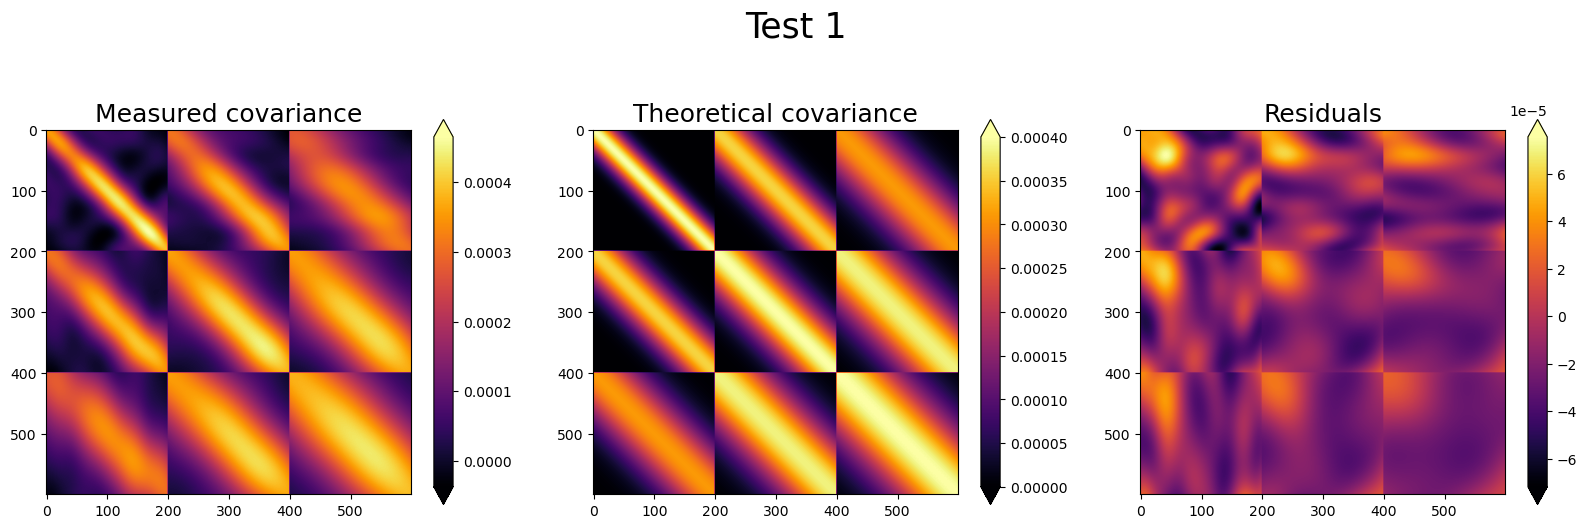

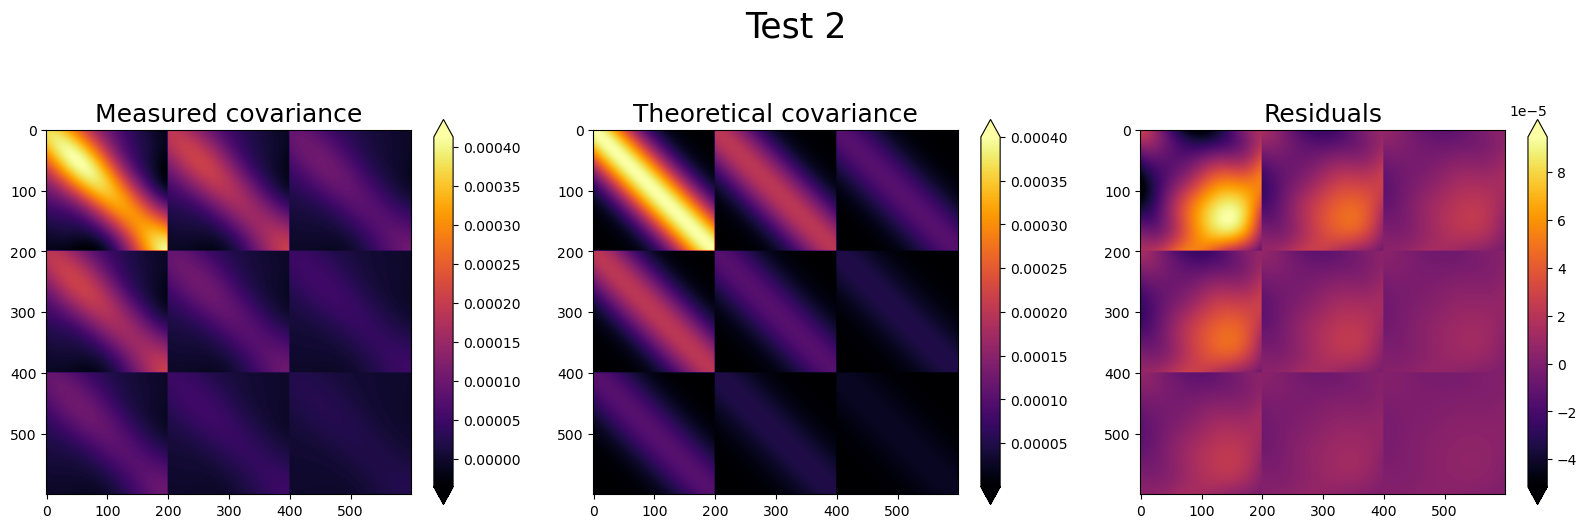

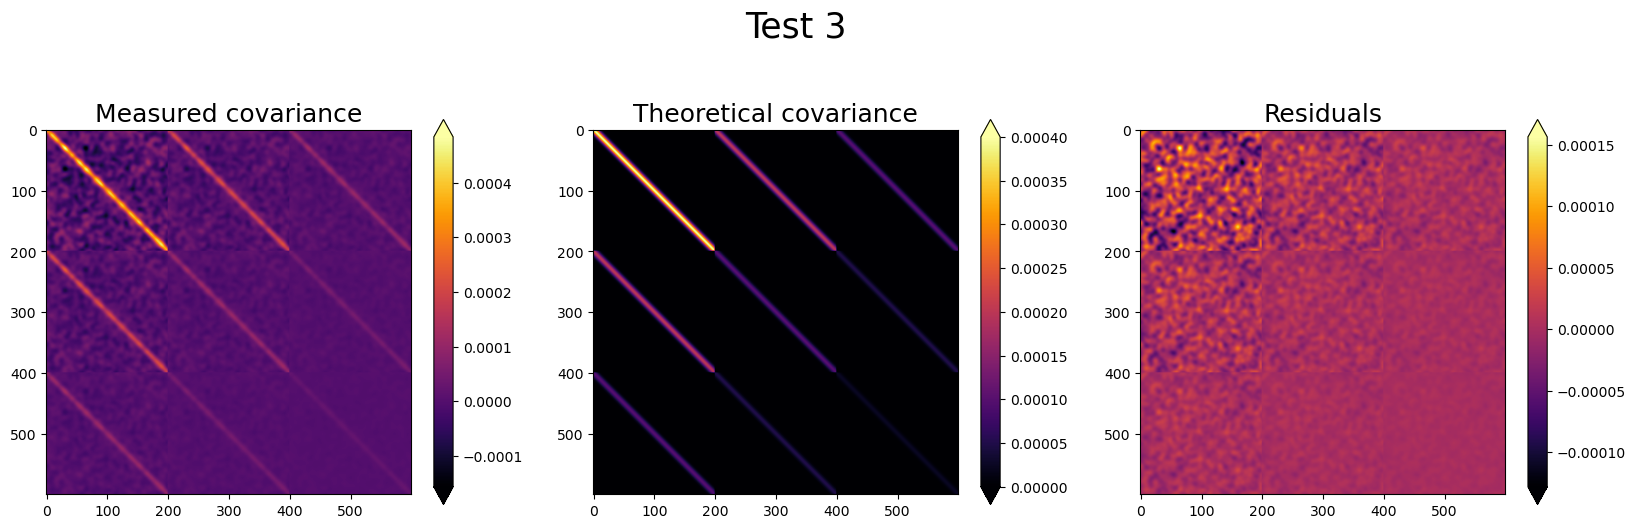

In [17]:
#Test 1

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(20, 5), ncols=3)
fig.suptitle('Test 1',fontsize=25, y=1.1)

# Measured covariance 
cb1 = ax1.imshow(cov31, cmap='inferno')
ax1.set_title('Measured covariance', fontsize=18)
cbar = plt.colorbar(cb1, ax=ax1, extend='both')

#Theoretical cov
ax2.set_title('Theoretical covariance', fontsize=18)
cb2 = ax2.imshow(cov_thf1, cmap='inferno')
cbar = plt.colorbar(cb2, ax=ax2, extend='both')

#Residuals
ax3.set_title('Residuals', fontsize=18)
cb3 = ax3.imshow(cov_thf1-cov31, cmap='inferno')
cbar = plt.colorbar(cb3, ax=ax3, extend='both')


#Test 2

fig1, (ax4, ax5, ax6) = plt.subplots(figsize=(20, 5), ncols=3)
fig1.suptitle('Test 2',fontsize=25, y=1.1)

# Measured covariance
cb4 = ax4.imshow(cov32, cmap='inferno')
ax4.set_title('Measured covariance', fontsize=18)
cbar = plt.colorbar(cb4, ax=ax4, extend='both')

# Theoretical covariance
ax5.set_title('Theoretical covariance', fontsize=18)
cb5 = ax5.imshow(cov_thf2, cmap='inferno')
cbar = plt.colorbar(cb5, ax=ax5, extend='both')

# Residuals
ax6.set_title('Residuals', fontsize=18)
cb6 = ax6.imshow(cov_thf2-cov32, cmap='inferno')
cbar = plt.colorbar(cb6, ax=ax6, extend='both')


#Test 3

fig2, (ax7, ax8, ax9) = plt.subplots(figsize=(20, 5), ncols=3)
fig2.suptitle('Test 3',fontsize=25, y=1.1)

# Measured covariance
cb7 = ax7.imshow(cov33, cmap='inferno')
ax7.set_title('Measured covariance', fontsize=18)
cbar = plt.colorbar(cb7, ax=ax7, extend='both')

# Theoretical covariance
ax8.set_title('Theoretical covariance', fontsize=18)
cb8 = ax8.imshow(cov_thf3, cmap='inferno')
cbar = plt.colorbar(cb8, ax=ax8, extend='both')

#Residuals
ax9.set_title('Residuals', fontsize=18)
cb9 = ax9.imshow(cov_thf3-cov33, cmap='inferno')
cbar = plt.colorbar(cb9, ax=ax9, extend='both')

plt.show()